# Yahoo API
Install API in Yahoo finance


In [196]:
#pip install yfinance

# Load stock price


# Load Apple stock price(AAPL)

Period: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'

In [210]:
import yfinance as yf
import pandas as pd
import numpy as np

print(yf.__version__)

0.2.55


In [200]:
#Apple Stock Price.

data_Ticker_AAPL = yf.Ticker("AAPL")
data_AAPL=data_Ticker_AAPL.history(period="3mo")
close_price_AAPL = data_AAPL['Close'].values[0]
print(close_price_AAPL)


234.14256286621094


# Load Nvidia stock price(NVDA)
Period: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'

In [5]:
#Nvidia Stock Price.

data_Ticker_NVDA = yf.Ticker("NVDA")
data_NVDA=data_Ticker_NVDA.history(period="1d")
close_price_NVDA = data_NVDA['Close'].values[0]
print(close_price_NVDA)

107.56999969482422


# Load Microsoft stock price(MSFT)
Period: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'

In [59]:
#Microsoft 주가 가져오기.
data_Ticker_MSFT = yf.Ticker("MSFT")
data_MSFT=data_Ticker_MSFT.history(period="3mo")
close_price_MSFT = data_MSFT['Close'].values[0]
print(close_price_MSFT)

416.35516357421875


## Find pair by comparing stock prices.

Candidate pair: Apple-Microsoft, AMD-Intel, Delta(Amerian) - United airline

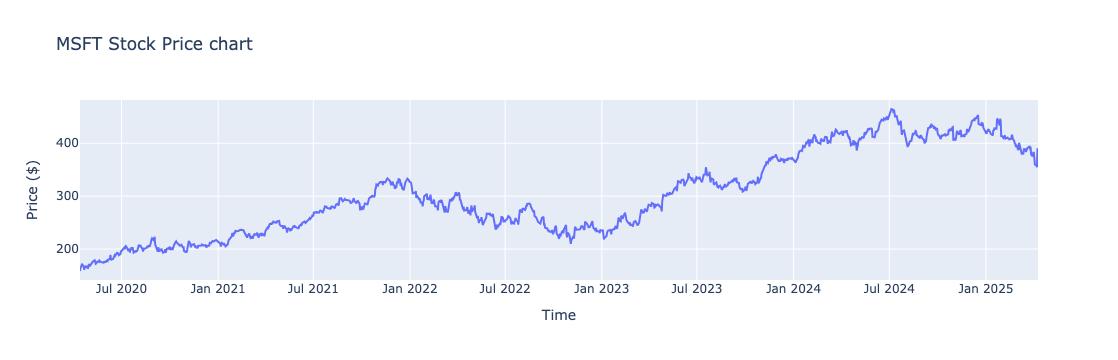

In [176]:
import yfinance as yf
import plotly.graph_objects as go

MSFTTicker = yf.Ticker("MSFT")
MSFTData = MSFTTicker.history(period="5y", interval="1d")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=MSFTData.index,
    y=round(MSFTData['Close'],2),
    mode='lines',
    name='MSFT Closed price ($)'
))

fig.update_layout(
    title='MSFT Stock Price chart',
    xaxis_title='Time',
    yaxis_title='Price ($)',
    hovermode='x'  # 마우스 포인터와 x축을 맞추어 보여줌
)

fig.show()


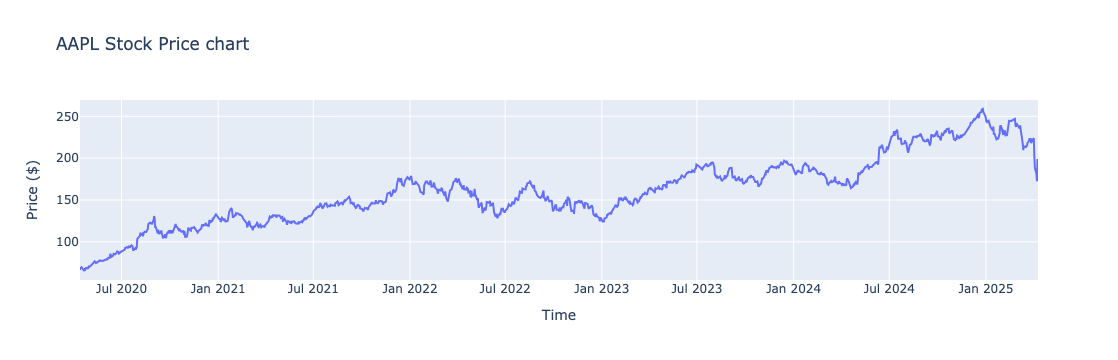

In [178]:
AAPLTicker = yf.Ticker("AAPL")
AAPLData = AAPLTicker.history(period="5y", interval="1d")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=AAPLData.index,
    y=round(AAPLData['Close'],2),
    mode='lines',
    name='AAPL Closed price ($)'
))

fig.update_layout(
    title='AAPL Stock Price chart',
    xaxis_title='Time',
    yaxis_title='Price ($)',
    hovermode='x'  # 마우스 포인터와 x축을 맞추어 보여줌
)

fig.show()

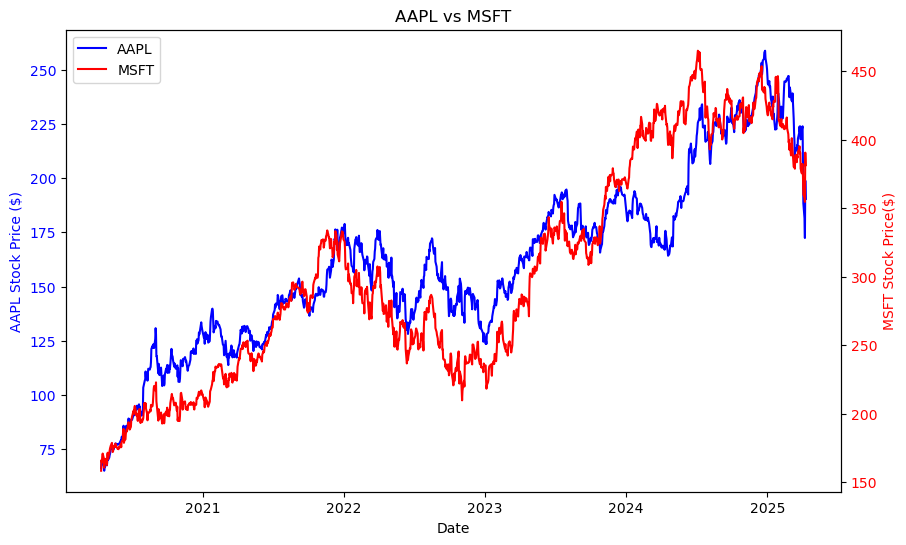

In [180]:
fig, ax1 = plt.subplots(figsize =(10,6))

ax1.plot(AAPLData.index, AAPLData["Close"], color = 'blue', label = "AAPL")
ax1.set_xlabel("Date")
ax1.set_ylabel("AAPL Stock Price ($)", color = "blue")
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(MSFTData.index,MSFTData['Close'], color = 'red', label = 'MSFT')
ax2.set_xlabel("Date")
ax2.set_ylabel("MSFT Stock Price($)", color = 'red')
ax2.tick_params(axis='y',labelcolor='red')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1+ labels2, loc="best")

plt.title("AAPL vs MSFT")
plt.show()

-0.6297986931831374
: -0.5277002481175294
하한선: -0.7318971382487455


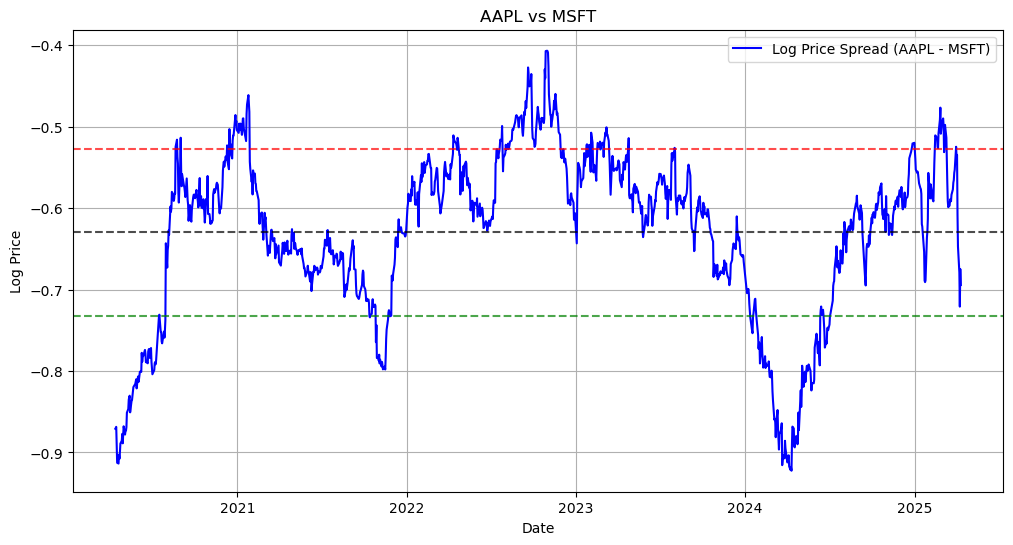

In [256]:
df = pd.DataFrame({
    "AAPL": aapl_data["Close"],
    "MSFT": msft_data["Close"]
})

# 3. 결측치 제거 (날짜가 맞지 않는 경우 대비)
df.dropna(inplace=True)

df["log_AAPL"] = np.log(df["AAPL"])
df["log_MSFT"] = np.log(df["MSFT"])

df["spread"] = df["log_AAPL"] - df["log_MSFT"]

centerLine = df['spread'].mean()
print(centerLine)

std_dev = df["spread"].std()

upperThreshold = centerLine + std_dev  # 상한
lowerThreshold = centerLine - std_dev  # 하한

print(":", upperThreshold)
print("하한선:", lowerThreshold)


plt.figure(figsize=(12, 6))
plt.plot(df.index, df["spread"], color="blue", label="Log Price Spread (AAPL - MSFT)")
plt.axhline(y=centerLine, color="black", linestyle="--", alpha=0.7)  # 기준선 0 추가
plt.axhline(y=upperThreshold, color="red", linestyle="--", alpha=0.7)  # 기준선 0 추가
plt.axhline(y=lowerThreshold, color="green", linestyle="--", alpha=0.7)  # 기준선 0 추가

plt.title("AAPL vs MSFT")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()
plt.grid(True)
plt.show()

In [182]:
INTCTicker = yf.Ticker("INTC")
INTCData = INTCTicker.history(period="5y", interval="1d")

AMDTicker = yf.Ticker("AMD")
AMDData = AMDTicker.history(period="5y", interval="1d")


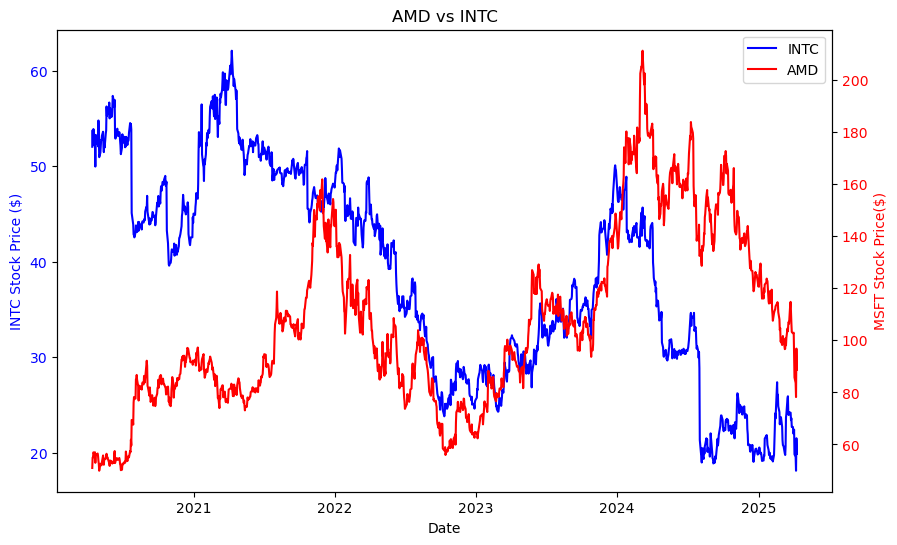

In [184]:
fig, ax3 = plt.subplots(figsize =(10,6))

ax3.plot(INTCData.index, INTCData["Close"], color = 'blue', label = "INTC")
ax3.set_xlabel("Date")
ax3.set_ylabel("INTC Stock Price ($)", color = "blue")
ax3.tick_params(axis='y', labelcolor='blue')

ax4 = ax3.twinx()

ax4.plot(AMDData.index,AMDData['Close'], color = 'red', label = 'AMD')
ax4.set_xlabel("Date")
ax4.set_ylabel("MSFT Stock Price($)", color = 'red')
ax4.tick_params(axis='y',labelcolor='red')

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3+ labels4, loc="best")

plt.title("AMD vs INTC")
plt.show()

In [186]:
AALTicker = yf.Ticker("AAL")
AALData = AALTicker.history(period="5y", interval="1d")

UALTicker = yf.Ticker("UAL")
UALData = UALTicker.history(period="5y", interval="1d")


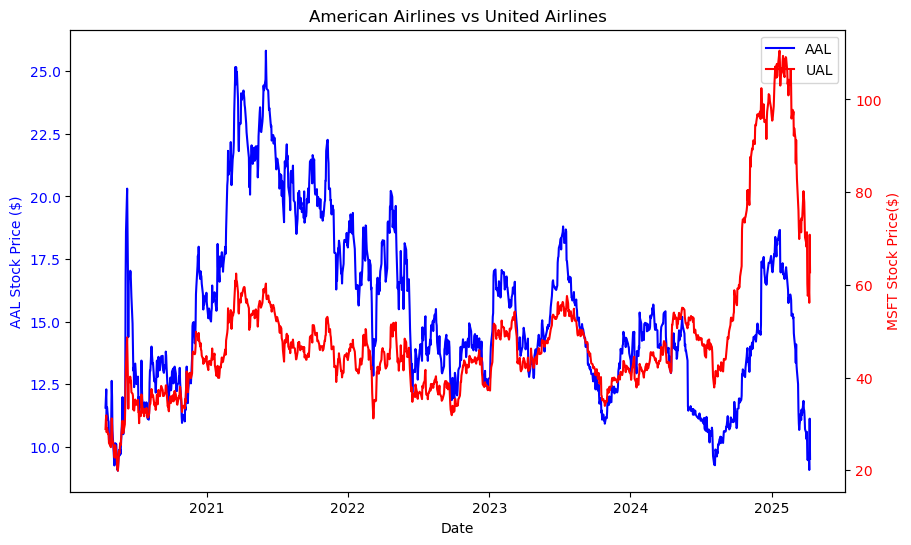

In [188]:
fig, ax5 = plt.subplots(figsize =(10,6))

ax5.plot(AALData.index, AALData["Close"], color = 'blue', label = "AAL")
ax5.set_xlabel("Date")
ax5.set_ylabel("AAL Stock Price ($)", color = "blue")
ax5.tick_params(axis='y', labelcolor='blue')

ax6 = ax5.twinx()

ax6.plot(UALData.index,UALData['Close'], color = 'red', label = 'UAL')
ax6.set_xlabel("Date")
ax6.set_ylabel("MSFT Stock Price($)", color = 'red')
ax6.tick_params(axis='y',labelcolor='red')

lines5, labels5 = ax5.get_legend_handles_labels()
lines6, labels6 = ax6.get_legend_handles_labels()
ax5.legend(lines5 + lines6, labels5+ labels6)

plt.title("American Airlines vs United Airlines")
plt.show()